# Spotify Dataset
https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset?select=dataset-of-10s.csv

(Using dataset of songs from the 2010s decade)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import import_ipynb
from functions import *
from time import time

importing Jupyter notebook from functions.ipynb


In [2]:
data = pd.read_csv('data/spotify.csv', header=0)
data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


In [3]:
data = data.drop(columns=['track', 'artist', 'uri'])

## Data Evaluation
---

### Checking for null values

In [4]:
if data.isna().sum().sum() == 0:
    print('No missing values present')
else: 
    print('NaN values across entire dataset: ', data.isna().sum().sum())

No missing values present


### Heatmap
Feature Colliniearity
- *Some multicolliniearity observed between loudness/energy & sections/duration_ms - L2 regularization ideal*

Text(0.5, 1.0, 'Spotify Dataset Colliniearity')

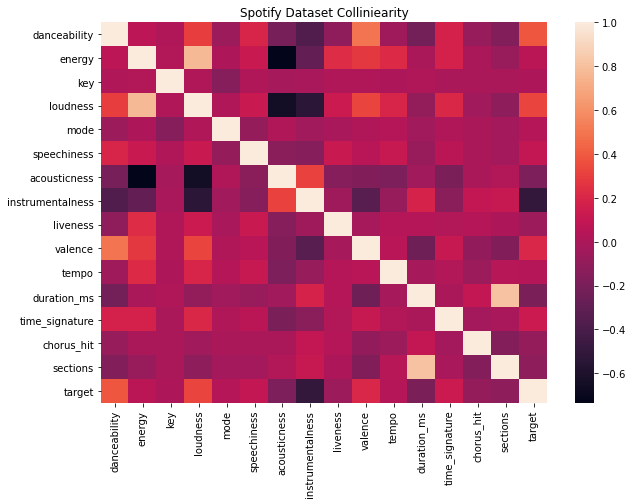

In [5]:
corr = data.loc[:, data.columns != 'Class'].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr)
plt.title('Spotify Dataset Colliniearity')

### Histogram
Feature Distributions

Text(0.5, 0.92, 'Spotify Dataset Feature Distributions')

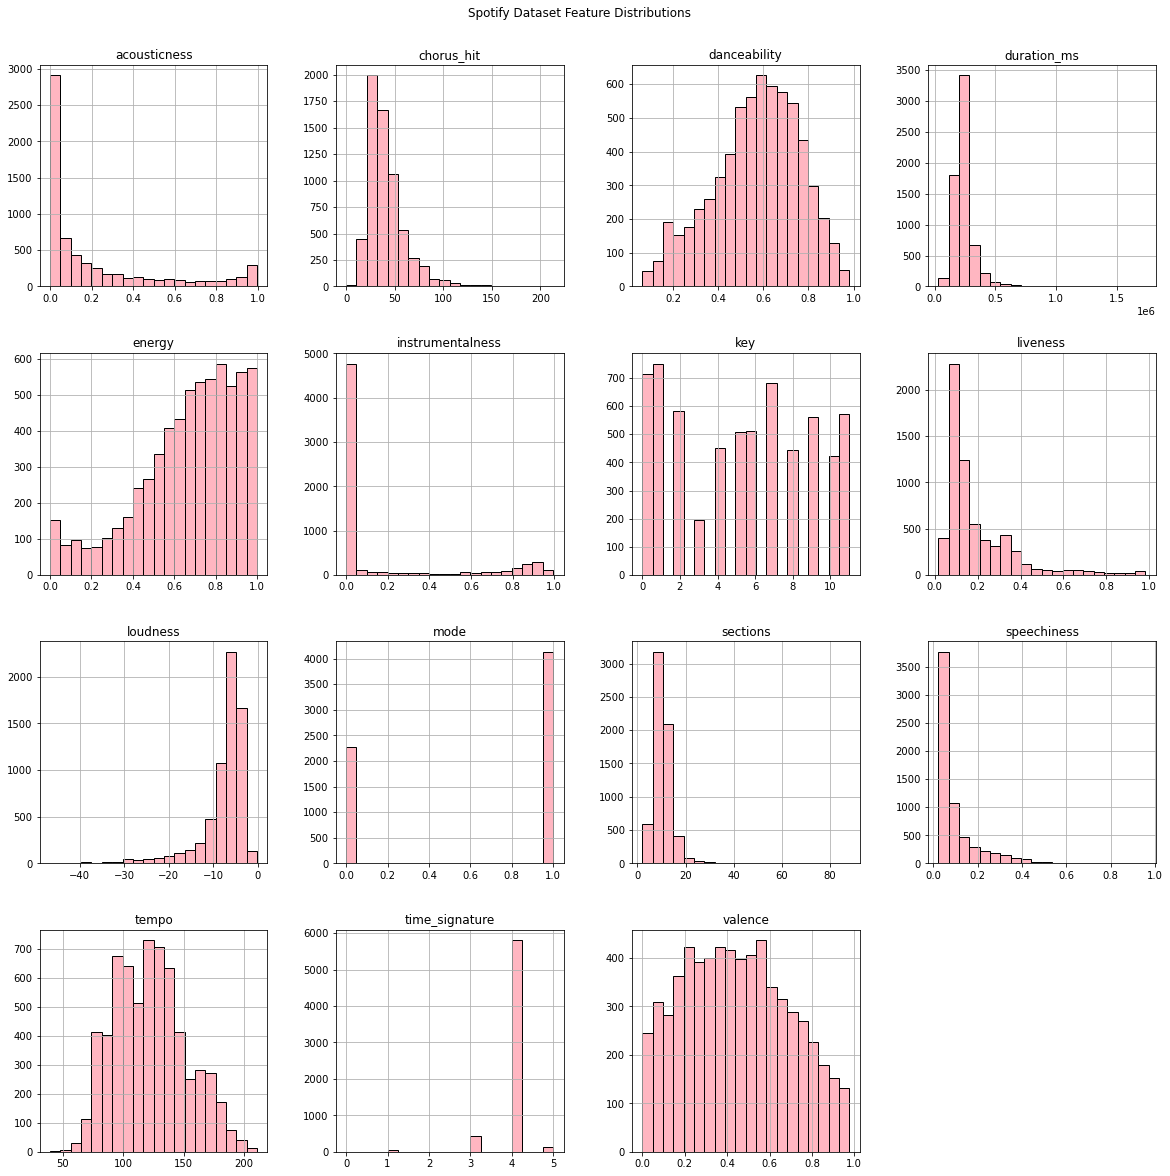

In [6]:
data.loc[:, data.columns != 'target'].hist(bins=20, figsize=(20,20), color='lightpink', ec='black')
plt.suptitle('Spotify Dataset Feature Distributions', y=0.92)

### Pie Chart 
Class Balance
- *No class imbalance*

In [7]:
class_counts = data['target'].value_counts()
class_counts

1    3199
0    3199
Name: target, dtype: int64

Text(0.5, 1.05, 'Spotify Dataset Class Distribution')

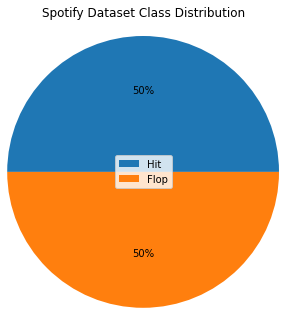

In [8]:
classes = ['Hit', 'Flop']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.0f%%', radius=1.25)
plt.legend(labels=classes, loc='center')
plt.title('Spotify Dataset Class Distribution', y=1.05)

## Data Preparation
---

In [9]:
#Train/test/val subsets
train, test = train_test_split(data, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)

In [10]:
#Separating labels from data
x_test, y_test = features_labels_split(test, 'target')
x_train, y_train = features_labels_split(train, 'target')
x_val, y_val = features_labels_split(val, 'target')

In [11]:
#Scaling
scaler = preprocessing.MinMaxScaler() 

x_train = scaler.fit_transform(x_train) 
x_val = scaler.transform(x_val) 
x_test = scaler.transform(x_test) 

In [12]:
#Label one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [13]:
print(f'Total samples: {x_test.shape[0] + x_train.shape[0] + x_val.shape[0]}')
print(f'Testing samples: {x_test.shape[0]}') 
print(f'Training samples: {x_train.shape[0]}')
print(f'Validation samples {x_val.shape[0]}')

Total samples: 6398
Testing samples: 640
Training samples: 5182
Validation samples 576


## Model
---

In [14]:
#Define
model = Sequential()
model.add(Dense(units=16, input_dim=15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                256       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

In [16]:
#Compile
model.compile(optimizer = Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [17]:
#Fit
start = time()

history = model.fit(x_train, 
                    y_train, 
                    validation_data = (x_val, y_val),
                    epochs=400, 
                    batch_size=10, 
                    verbose=0)

print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Complete. 
Model trained in 182.42 sec


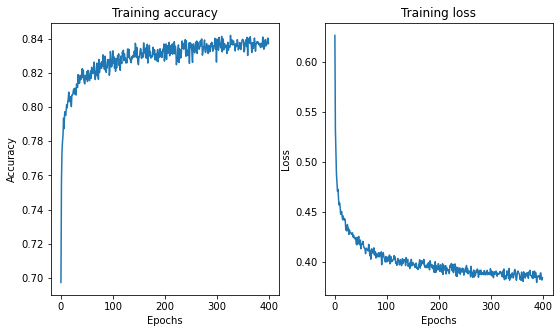


Training accuracy: 83.71%
Training loss: 0.384


In [18]:
plot_display_metrics(model, history)

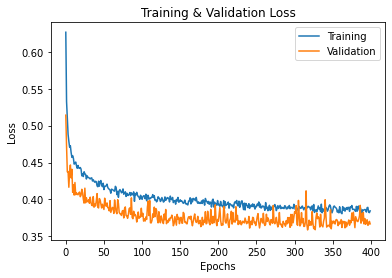


Training accuracy: 83.71%
Training loss: 0.384

Validation accuracy: 84.55%
Validation loss: 0.367


In [19]:
plot_train_val(history)

In [20]:
test_score = model.evaluate(x_test, y_test)
print(f"Testing accuracy: {round(test_score[1], 4) * 100}%")
print(f"Testing loss: {round(test_score[0], 3)}")

20/20 [==============================] - 0s 998us/step - loss: 0.3523 - accuracy: 0.8438
Testing accuracy: 84.38%
Testing loss: 0.352


## Model Evaluation
---

### Confusion Matrix

In [21]:
#Encased in np.argmax() to convert from one-hot encoding to regular so it can work with sklearn functionality
y_pred = np.argmax(model.predict(x_test), axis=-1) 
y_true = np.argmax(y_test, axis=1)

print(np.unique(y_true)) #to check order classes appear in to correctly label confusion matrix
labels = ['Flop', 'Hit']

[0 1]


Text(33.0, 0.5, 'True')

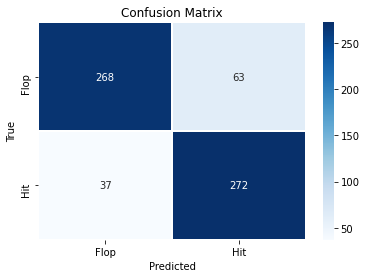

In [22]:
confusion = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(confusion, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('True') 

In [23]:
print(f'False positives: ', confusion[0, 1])
print(f'False negatives: ', confusion[1, 0])

False positives:  63
False negatives:  37


### Model Metrics

In [24]:
print(f'Weighted Precision: {round(precision_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted Recall: {round(recall_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted F1-score: {round(f1_score(y_true, y_pred, average="weighted") * 100, 2)}%')

Weighted Precision: 84.65%
Weighted Recall: 84.38%
Weighted F1-score: 84.37%
